In [10]:
library(plyr)
library(dplyr)
library(ggplot2)
library(MASS)
library(cowplot)
library(forcats)
library(ggforce)
library(ggrepel)
library(scales)
library(tidyr)
library(xts)
library(zoo)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last



In [27]:
soccerPitch <- function(lengthPitch = 105, widthPitch = 68, arrow = c("none", "r", "l"), title = NULL, subtitle = NULL, theme = c("light", "dark", "grey", "grass")) {
  
  # define colours by theme
  if(theme[1] == "grass") {
    fill1 <- "#008000"
    fill2 <- "#328422"
    colPitch <- "grey85"
    arrowCol <- "white"
    colText <- "white"
  } else if(theme[1] == "light") {
    fill1 <- "grey98"
    fill2 <- "grey98"
    colPitch <- "grey60"
    arrowCol = "black"
    colText <- "black"
  } else if(theme[1] %in% c("grey", "gray")) {    
    fill1 <- "#A3A1A3"
    fill2 <- "#A3A1A3"
    colPitch <- "white"
    arrowCol <- "white"
    colText <- "black"
  } else if(theme[1] == "dark") {  
    fill1 <- "#1C1F26"
    fill2 <- "#1C1F26"
    colPitch <- "white"
    arrowCol <- "white"
    colText <- "white"
  } else if(theme[1] == "blank") {
    fill1 <- "white"
    fill2 <- "white"
    colPitch <- "white"
    arrowCol <- "black"
    colText <- "black"
  }
  lwd <- 0.5
  
  # outer border (t,r,b,l)
  border <- c(10, 6, 5, 6)
  
  # mowed grass lines
  lines <- (lengthPitch + border[2] + border[4]) / 13
  boxes <- data.frame(start = lines * 0:12 - border[4], end = lines * 1:13 - border[2])[seq(2, 12, 2),]
  
  # draw pitch
  p <- ggplot() +
    # background
    geom_rect(aes(xmin = -border[4], xmax = lengthPitch + border[2], ymin = -border[3], ymax = widthPitch + border[1]), fill = fill1) +
    # mowed pitch lines
    geom_rect(data = boxes, aes(xmin = start, xmax = end, ymin = -border[3], ymax = widthPitch + border[1]), fill = fill2) +
    # perimeter line
    geom_rect(aes(xmin = 0, xmax = lengthPitch, ymin = 0, ymax = widthPitch), fill = NA, col = colPitch, lwd = lwd) +
    # centre circle
    geom_circle(aes(x0 = lengthPitch/2, y0 = widthPitch/2, r = 9.15), col = colPitch, lwd = lwd) +
    # kick off spot
    geom_circle(aes(x0 = lengthPitch/2, y0 = widthPitch/2, r = 0.25), fill = colPitch, col = colPitch, lwd = lwd) +
    # halfway line
    geom_segment(aes(x = lengthPitch/2, y = 0, xend = lengthPitch/2, yend = widthPitch), col = colPitch, lwd = lwd) +
    # penalty arcs
    geom_arc(aes(x0= 11, y0 = widthPitch/2, r = 9.15, start = pi/2 + 0.9259284, end = pi/2 - 0.9259284), col = colPitch, lwd = lwd) +
    geom_arc(aes(x0 = lengthPitch - 11, y0 = widthPitch/2, r = 9.15, start = pi/2*3 - 0.9259284, end = pi/2*3 + 0.9259284), col = colPitch, lwd = lwd) +
    # penalty areas
    geom_rect(aes(xmin = 0, xmax = 16.5, ymin = widthPitch/2 - 20.15, ymax = widthPitch/2 + 20.15), fill = NA, col = colPitch, lwd = lwd) +
    geom_rect(aes(xmin = lengthPitch - 16.5, xmax = lengthPitch, ymin = widthPitch/2 - 20.15, ymax = widthPitch/2 + 20.15), fill = NA, col = colPitch, lwd = lwd) +
    # penalty spots
    geom_circle(aes(x0 = 11, y0 = widthPitch/2, r = 0.25), fill = colPitch, col = colPitch, lwd = lwd) +
    geom_circle(aes(x0 = lengthPitch - 11, y0 = widthPitch/2, r = 0.25), fill = colPitch, col = colPitch, lwd = lwd) +
    # six yard boxes
    geom_rect(aes(xmin = 0, xmax = 5.5, ymin = (widthPitch/2) - 9.16, ymax = (widthPitch/2) + 9.16), fill = NA, col = colPitch, lwd = lwd) +
    geom_rect(aes(xmin = lengthPitch - 5.5, xmax = lengthPitch, ymin = (widthPitch/2) - 9.16, ymax = (widthPitch/2) + 9.16), fill = NA, col = colPitch, lwd = lwd) +
    # goals
    geom_rect(aes(xmin = -2, xmax = 0, ymin = (widthPitch/2) - 3.66, ymax = (widthPitch/2) + 3.66), fill = NA, col = colPitch, lwd = lwd) +
    geom_rect(aes(xmin = lengthPitch, xmax = lengthPitch + 2, ymin = (widthPitch/2) - 3.66, ymax = (widthPitch/2) + 3.66), fill = NA, col = colPitch, lwd = lwd) +
    coord_fixed() +
    theme(rect = element_blank(), 
          line = element_blank(),
          axis.text = element_blank(),
          axis.title = element_blank())
  
#   # add arrow
#   if(arrow[1] == "r") {
#     p <- p + 
#       geom_segment(aes(x = 0, y = -2, xend = lengthPitch / 3, yend = -2), colour = arrowCol, size = 1.5, arrow = arrow(length = unit(0.2, "cm"), type="closed"), linejoin='mitre')
#   } else if(arrow[1] == "l") {
#     p <- p + 
#       geom_segment(aes(x = lengthPitch, y = -2, xend = lengthPitch / 3 * 2, yend = -2), colour = arrowCol, size = 1.5, arrow = arrow(length = unit(0.2, "cm"), type="closed"), linejoin='mitre')
#   }
  
#   # add title and/or subtitle
#   theme_buffer <- ifelse(theme[1] == "light", 0, 4)
#   if(!is.null(title) & !is.null(subtitle)) {
#     p <- p +
#       cowplot::draw_text(title, 
#                          x = 0, y = widthPitch + 9, hjust = 0, vjust = 1,
#                          size = 15, fontface = 'bold', col = colText) +
#       cowplot::draw_text(subtitle, 
#                          x = 0, y = widthPitch + 4.5, hjust = 0, vjust = 1,
#                          size = 13, col = colText) +
#       theme(plot.margin = unit(c(-0.525,-0.9,-0.7,-0.9), "cm"))
#   } else if(!is.null(title) & is.null(subtitle)) {
#     p <- p +
#       cowplot::draw_text(title, 
#                          x = 0, y = widthPitch + 4.5, hjust = 0, vjust = 1,
#                          size = 15, fontface = 'bold', col = colText) +
#       theme(plot.margin = unit(c(-0.9,-0.9,-0.7,-0.9), "cm"))
#   } else if(is.null(title) & !is.null(subtitle)) {
#     p <- p +
#       cowplot::draw_text(subtitle, 
#                          x = 0, y = widthPitch + 4.5, hjust = 0, vjust = 1,
#                          size = 13, col = colText) +
#       theme(plot.margin = unit(c(-0.9,-0.9,-0.7,-0.9), "cm"))
#   } else if(is.null(title) & is.null(subtitle)){
#     p <- p +
#       theme(plot.margin = unit(c(-1.2,-0.9,-0.7,-0.9), "cm"))
#   }
  
  
  return(p)
  
}

In [3]:
events <- read.csv('../data/processed_events_England.csv')

x_scale <- 105
y_scale <- 68

events$location_x <- events$location_x/100 * x_scale
events$target_x <- events$target_x/100 * x_scale

events$location_y <- y_scale - (events$location_y/100 * y_scale)
events$target_y <- y_scale - (events$target_y/100 * y_scale)

In [5]:
game <- events[events$matchId == '2500032',]

In [6]:
game_events <- game[game$eventName == 'Pass'| game$eventName == 'Shot' | game$eventName == 'Duel' | game$eventName == 'Free Kick',]

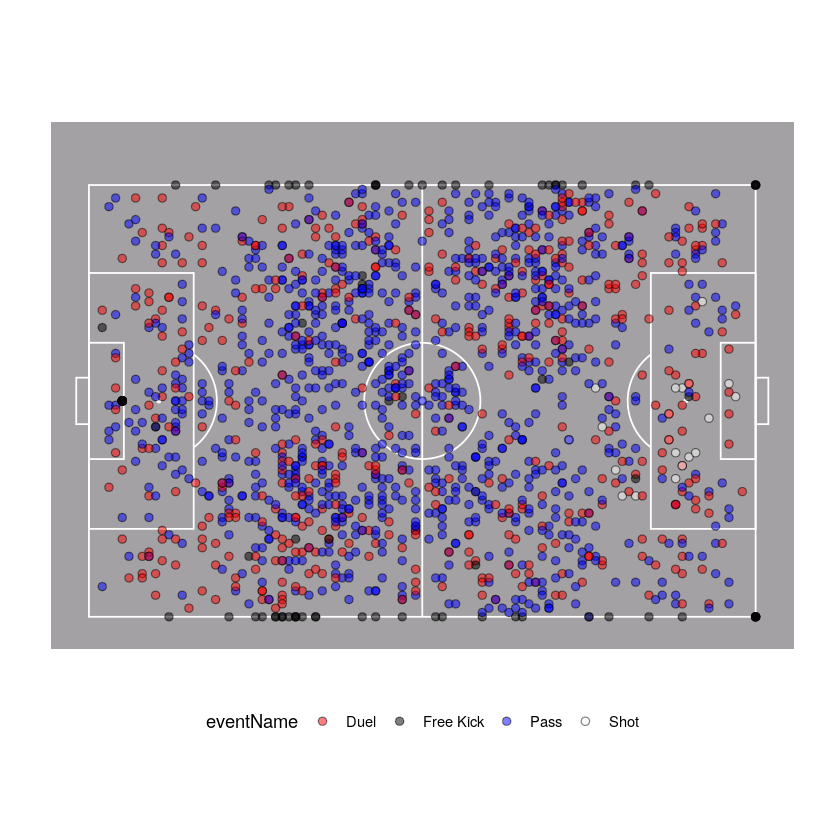

In [28]:
soccerPitch(theme='grey') + 
    geom_point(data = game_events, 
           aes(location_x , location_y, fill=eventName), pch=21, alpha=0.5, size=2 ) + 
    theme(legend.position='bottom') +
    scale_fill_manual(values=c("red", "black", "blue", 'white'))

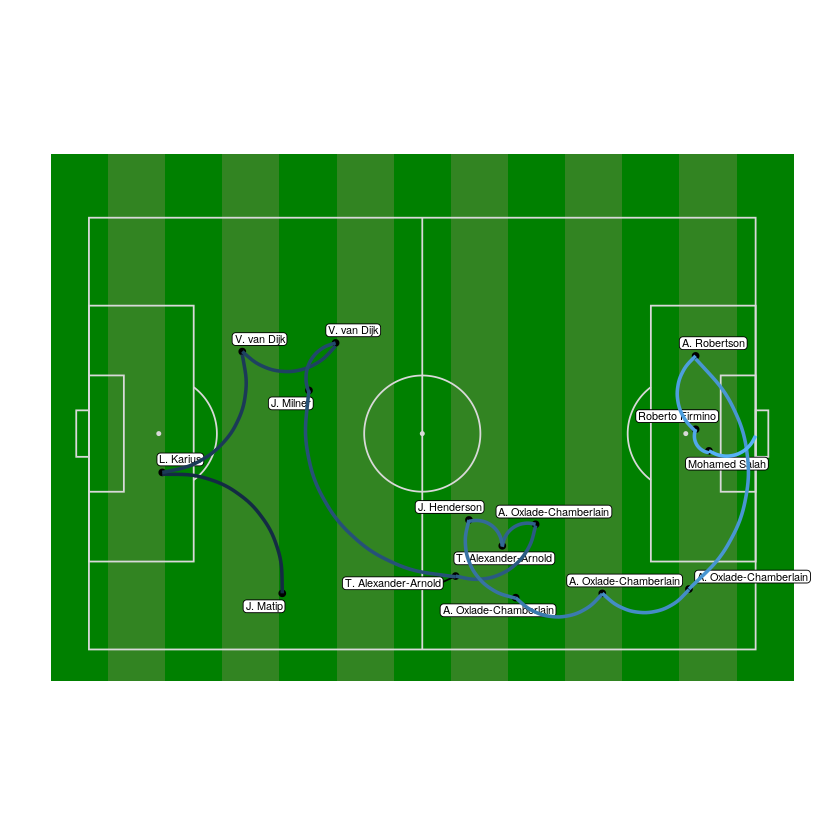

In [29]:
id <-  '2500032-91-Liv-0'
# id <- best_goal_sequences[1]
data <- events[events$possession == id,]
# 534 is brighton vs bournemouth
# data <- events[events$possession == '2499759-46-Bri&HovAlb-0',]
# data <- events[events$possession == '2499889-18-Liv-0',]
# data <- events[events$possession == '2499774-85-ManCit-0',] #2500065-23-ManCit-1',]#2499913-77-Liv-0',]

soccerPitch(theme='grass') + geom_point(data = data,
               aes(location_x , location_y)) + 
    geom_label_repel(data = data, aes(location_x, location_y, label = source), label.padding=0.1, size=2.3, alpha=1) +
 geom_curve(data = data,
              aes(x = location_x, xend = target_x, y = location_y, yend = target_y*.99, col = X), show.legend=FALSE, size=1, alpha = 1)


<img src="../figures/youtube_clip.gif">

Warning message:
“Ignoring unknown parameters: circular”

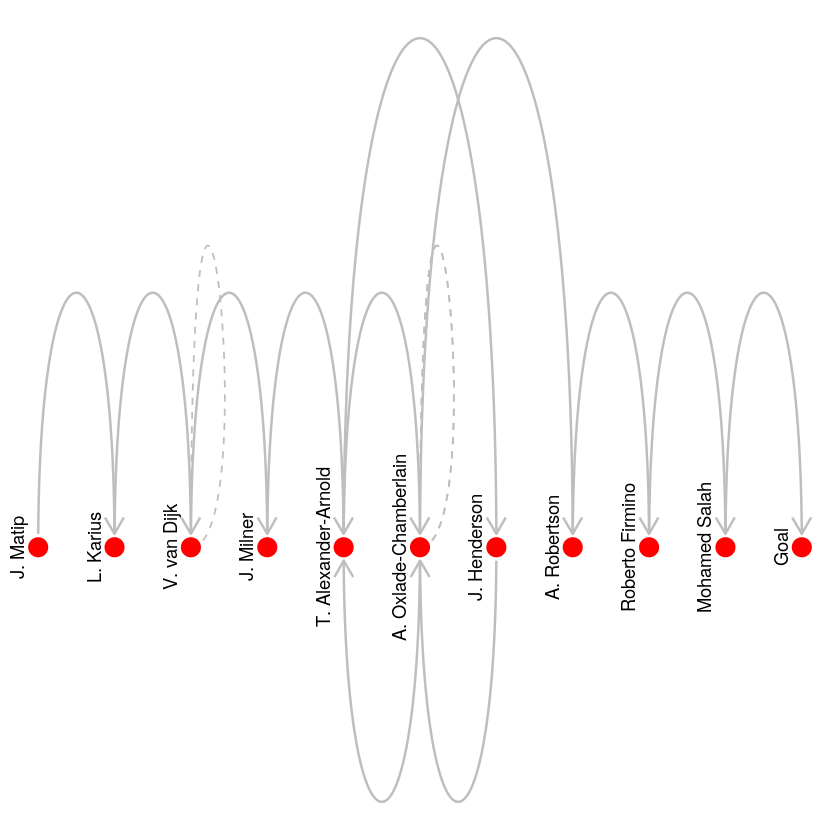

In [17]:
nodes <- unique(c(as.character(data$source),as.character(data$target)))
edges <- data.frame(data$source, data$target)
g <- graph_from_data_frame(d=edges, vertices=nodes, directed=TRUE)
ggraph(g, layout='linear') + 
    geom_edge_arc(aes(start_cap = label_rect(node1.name), 
                       end_cap = label_rect(node2.name)), 
                  circular=T,
                  arrow=arrow(length=unit(4,'mm')), 
                  color='grey', width=0.7, fold=F) +
    geom_edge_loop(color='grey', linetype='dashed') +
    geom_node_point(size=5, color='red') +
    geom_node_text(aes(label = name), repel=T, angle=90, hjust=2, ) +
    theme_void()

In [15]:
library(ggraph)

In [16]:
library(igraph)


Attaching package: ‘igraph’

The following object is masked from ‘package:tidyr’:

    crossing

The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

